# **KNN** - K-Nearest Neighbours


K-Nearest neighbours or KNN is a simple yet effective classification algorithm. Consider the dataset that we use, it has 4 features and 3 label classes. KNN works by plotting the training data points on a graph. When a new datapoint (The testing datapoint) is introduced into the plot, The algorithm first finds the distance of that test point with all the training points. It then takes the K nearest neighbours to that point, where K is user defined (or hard coded). It then looks at the classes of the K nearest points and find the class which is in majority in that list.
Finally it assigns the prediction of the testing point to be the majority label class.

Our end goal for this project is to run the KNN algoritm on our dataset for several values of K and plot the efficiencies of these runs with respect to the K-values

### **Note:** This code is only for practice and hence is not of the industry standard clean coding 

In [86]:

#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split





In [87]:

from sklearn import datasets
# Load Dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target
x = np.array(x)


### As an example of how our data looks:
We are only taking the first two features into account

C:\Users\Aditya Kulkarni\AppData\Local\Temp\ipykernel_24652\957008262.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(x.T[0],x.T[1],c = point_colors,cmap="viridis",s = 10,)


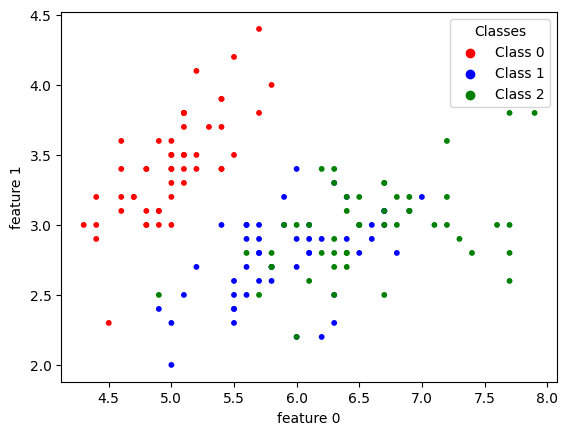

In [88]:
colors = {0: 'red', 1: 'blue', 2: 'green'}
point_colors = [colors[c] for c in y]
scatter = plt.scatter(x.T[0],x.T[1],c = point_colors,cmap="viridis",s = 10,)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
for cls, color in colors.items():
    plt.scatter([], [], c=color, label=f'Class {cls}')  
plt.legend(title="Classes")
plt.show()

In [89]:
# Modify the bubble sort algorithm to return the orignal indices of the sorted array
def bubblesort(arr):
                n = len(arr)
                index = []
                for i in range(n):
                    index.append(i)

                
                for i in range(n):
                    for j in range(0,n - i - 1 ):
                        if arr[j] > arr[j+1]:
                            arr[j], arr[j+1] = arr[j+1], arr[j]
                            index[j],index[j+1] = index[j+1], index[j]
                return arr,index

In [ ]:
# Main KNN fuction
def KNN(features,labels):
    
    # Split the data into training and testing
    x_train,test_x,y_train,test_y = train_test_split(features,labels,shuffle=True)
    
    # Initiallize lists to hold k-values and efficiencies 
    valuesofk = []
    effis = []
    # Run over values of K ranginf from 0 to the length of testing set
    for k in range(len(x_train)):
        # initiallize counters for right and wrong answers
        right_answers = 0
        wrong_answers = 0

        # Append the current value of k into the respective list
        valuesofk.append(k)
        # Run over all testing datapoints
        for l in range(len(test_x)):
            # Store the values of the new point
            new_point = test_x[l]
            
            # initiallize list to store the distances of the new point wrt to all the training points
            dist_list = []
            x = x_train
            y = y_train 

            # Run over all training points
            for i in range(len(y)):
                dist = 0
                # Generalize the Eucledian distance formula to j dimensions
                for j in range(len(x[0])):
                    dist += (x[i][j] -new_point[j])**2
                # Append the distance into the list
                dist_list.append(np.sqrt(dist))
                


          
            # Sort dist_list and store the initial indices in "ind"
            sorted_dist_list, ind = bubblesort(dist_list)

            # make a list of all the possible classes
            unique_label = np.unique(y)

            # Initialize a counter with all initla values of 0 to count the number of elements pertaining to a class
            counter = np.zeros(len(unique_label))
            
            # Run over the K nearest neighbours
            for i in range(k):
                # check the labels of all the nighbours and update the counter accordingly
                for j in range(len(unique_label)):
                    if y[ind[i]] == unique_label[j]:
                        counter[j] += 1
                    
            # Find the majority class and predict that as our answer
            for i in range(len(counter)):
                a = counter[i]
                if a == np.max(counter): 
                    answer = (unique_label[i])
                    break
            # increase the right_answer counter by 1 if our predictions match
            if answer == test_y[l]: 
                right_answers = right_answers +1
                
            else: wrong_answers = wrong_answers+ 1
        # Calculate efficiency and append it to the list
        efficiency = right_answers/len(test_y)
        effis.append(efficiency)
      
     
    # Return the efficiencies and values of K list
    return valuesofk,effis

In [ ]:
# Call the function
k_values,efficiencies= KNN(x,y)


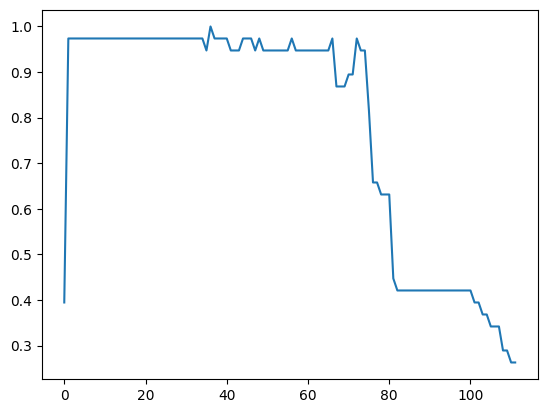

In [92]:
# Plot the efficiencies with respect to the values of K
plt.plot(k_values, efficiencies)
plt.show()
